In [3]:
!python -m wget https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip


Saved under Chessman-image-dataset.zip


In [ ]:
import zipfile
local_zip = 'Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

In [5]:
import os

os.listdir("dataset/Chess")

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [7]:
print('total pawn images :', len(os.listdir('dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('dataset/Chess/King')))
print('total Knight images :', len(os.listdir('dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


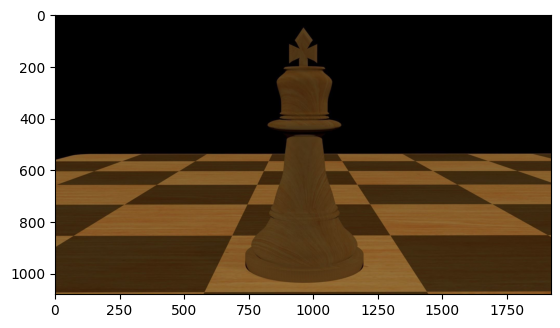

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = os.path.join('dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [12]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [13]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 14s - loss: 1.9132 - accuracy: 0.1723 - val_loss: 1.7853 - val_accuracy: 0.1923 - 14s/epoch - 221ms/step
Epoch 2/50
63/63 - 5s - loss: 1.7839 - accuracy: 0.1784 - val_loss: 1.7850 - val_accuracy: 0.1923 - 5s/epoch - 81ms/step
Epoch 3/50
63/63 - 5s - loss: 1.7797 - accuracy: 0.2064 - val_loss: 1.7871 - val_accuracy: 0.2308 - 5s/epoch - 83ms/step
Epoch 4/50
63/63 - 5s - loss: 1.7748 - accuracy: 0.1984 - val_loss: 1.7614 - val_accuracy: 0.2692 - 5s/epoch - 84ms/step
Epoch 5/50
63/63 - 5s - loss: 1.7392 - accuracy: 0.2244 - val_loss: 1.7689 - val_accuracy: 0.1731 - 5s/epoch - 78ms/step
Epoch 6/50
63/63 - 5s - loss: 1.7047 - accuracy: 0.2745 - val_loss: 1.7458 - val_accuracy: 0.2500 - 5s/epoch - 80ms/step
Epoch 7/50
63/63 - 5s - loss: 1.7045 - accuracy: 0.2826 - val_loss: 1.6763 - val_accuracy: 0.3462 - 5s/epoch - 79ms/step
Epoch 8/50
63/63 - 5s - loss: 1.6442 - accuracy: 0.3347 - val_loss: 1.6378 - val_accuracy: 0.3846 - 5s/epoch - 86ms/step
Epoch 9/50
63/63 - 6s - loss:

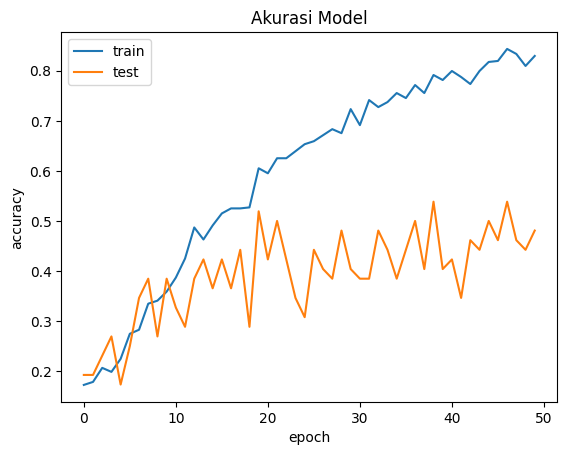

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

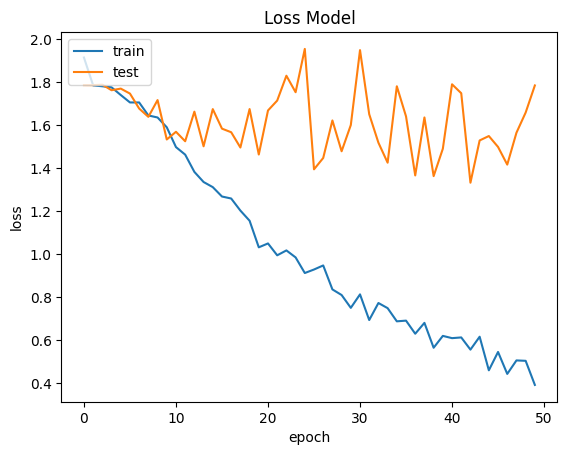

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model_resnet = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model_resnet.layers[0].trainable = False

234545216/234545216 [==============================] - 138s 1us/step


In [19]:
model_resnet.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
history = model_resnet.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 22s - loss: 7.6941 - accuracy: 0.4629 - val_loss: 2.0362 - val_accuracy: 0.6346 - 22s/epoch - 346ms/step
Epoch 2/50
63/63 - 7s - loss: 1.7774 - accuracy: 0.7094 - val_loss: 1.6128 - val_accuracy: 0.6346 - 7s/epoch - 111ms/step
Epoch 3/50
63/63 - 7s - loss: 1.4464 - accuracy: 0.7315 - val_loss: 1.3573 - val_accuracy: 0.7308 - 7s/epoch - 110ms/step
Epoch 4/50
63/63 - 7s - loss: 1.0567 - accuracy: 0.7796 - val_loss: 1.2342 - val_accuracy: 0.7115 - 7s/epoch - 109ms/step
Epoch 5/50
63/63 - 7s - loss: 1.0185 - accuracy: 0.8016 - val_loss: 1.0211 - val_accuracy: 0.7500 - 7s/epoch - 112ms/step
Epoch 6/50
63/63 - 7s - loss: 0.7439 - accuracy: 0.8417 - val_loss: 0.6180 - val_accuracy: 0.7692 - 7s/epoch - 111ms/step
Epoch 7/50
63/63 - 7s - loss: 0.5426 - accuracy: 0.8437 - val_loss: 1.7068 - val_accuracy: 0.6923 - 7s/epoch - 112ms/step
Epoch 8/50
63/63 - 7s - loss: 0.4875 - accuracy: 0.8637 - val_loss: 0.8984 - val_accuracy: 0.7308 - 7s/epoch - 112ms/step
Epoch 9/50
63/63 - 7s 

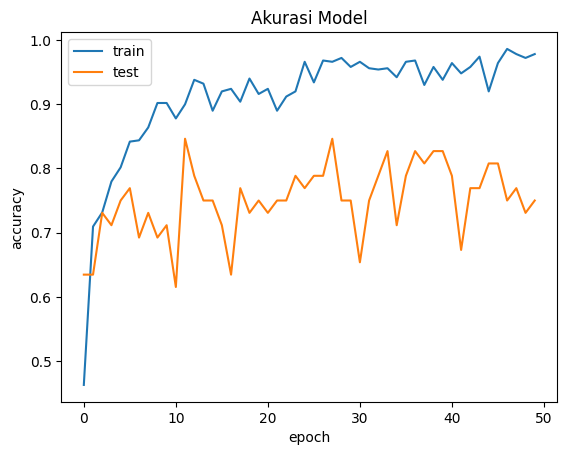

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

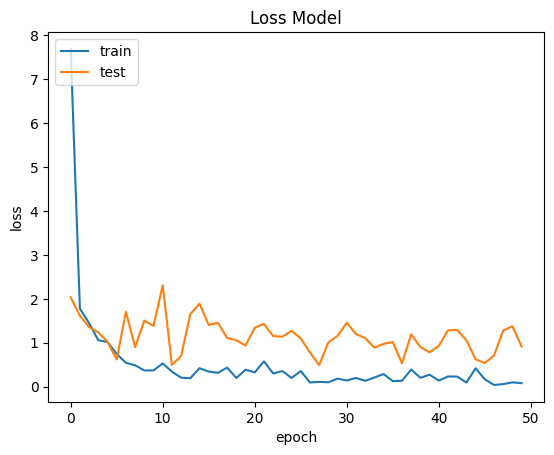

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()